In [36]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
path = 'https://stepik.org/media/attachments/lesson/90241/_d86a5a540dc13e476eae80f545cda446_monthly-milk-production.csv'

In [3]:
milk = pd.read_csv(path, ';',
                   index_col=['month'], parse_dates=['month'],
                   dayfirst=True)

In [4]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


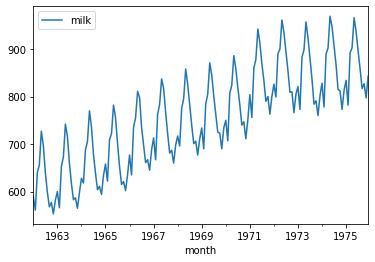

In [5]:
milk.plot();

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера.

In [6]:
# проверка стационарности ряда с помощью критерия Дики-Фуллера
# sm.tsa.stattools.adfuller(milk)
sm.tsa.stattools.adfuller(milk['milk'])

(-1.3038115874221285,
 0.6274267086030321,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

Чему равен полученный достигаемый уровень значимости?
Округлите до двух знаков после десятичной точки.

In [7]:
round(sm.tsa.stattools.adfuller(milk['milk'])[1], 2)

0.63

**Часто**, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, **имеет смысл** перед началом прогнозирования **поделить весь ряд на число дней в периоде**. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства `days_in_month` у индекса ряда или функции `monthrange` из пакета `calenda`r. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.


In [8]:
milk.index.days_in_month

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name='month', length=168)

In [9]:
milk['production_per_day'] = milk['milk'] / milk.index.days_in_month

In [10]:
milk

,milk,production_per_day
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
...,...,...
1975-08-01,858,27.677419
1975-09-01,817,27.233333
1975-10-01,827,26.677419


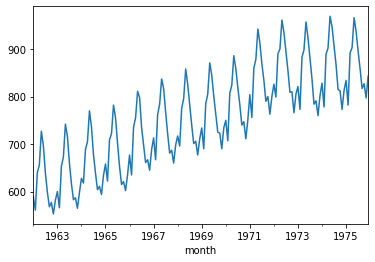

In [11]:
milk['milk'].plot();

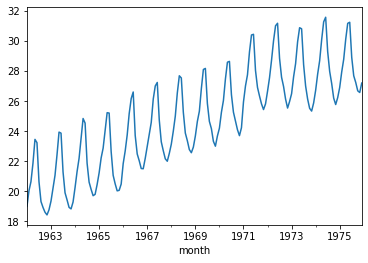

In [12]:
milk['production_per_day'].plot();

In [28]:
# В качестве ответа введите сумму значений полученного показателя за весь период;
# округлите до двух знаков после десятичной точки.
round(milk['production_per_day'].sum(), 2)

4166.33

Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [15]:
# данные по ежемесячному уровню производства молока в фунтах на одну корову
path = 'https://stepik.org/media/attachments/lesson/90246/_d86a5a540dc13e476eae80f545cda446_monthly-milk-production.csv'
milk = pd.read_csv(path, ';',
                   index_col=['month'], parse_dates=['month'],
                   dayfirst=True)

In [17]:
milk['production_per_day'] = milk['milk'] / milk.index.days_in_month

In [18]:
milk

,milk,production_per_day
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
...,...,...
1975-08-01,858,27.677419
1975-09-01,817,27.233333
1975-10-01,827,26.677419


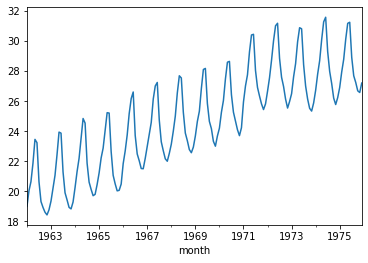

In [19]:
milk['production_per_day'].plot();

Для ряда со средним дневным количеством молока на корову с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным

In [22]:
# Дифференцирование можно делать так (разность между месяццами)
milk['prod_per_day_diff1'] = milk['production_per_day'] - milk['production_per_day'].shift(1)

# Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:
milk['prod_per_day_diff12'] = milk['production_per_day'] - milk['production_per_day'].shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

In [29]:
# проверка стационарности ряда с помощью критерия Дики-Фуллера
# sm.tsa.stattools.adfuller(milk)
sm.tsa.stattools.adfuller(milk['prod_per_day_diff1'].dropna())[1]

0.06430054654174605

In [30]:
sm.tsa.stattools.adfuller(milk['prod_per_day_diff12'].dropna())[1]

0.22127672658830372

In [31]:
# Попробуем провести 2 последовательных дифференцирования:
# сначала сезонное, затем обычное
milk['prod_per_day_diff_12_1'] = milk['prod_per_day_diff12'] - milk['prod_per_day_diff12'].shift(1)

In [32]:
sm.tsa.stattools.adfuller(milk['prod_per_day_diff_12_1'].dropna())[1]

2.280845551803768e-06

**Ответ:** Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

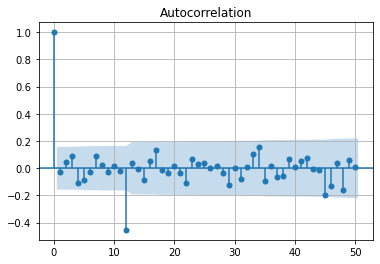

In [42]:
sm.graphics.tsa.plot_acf(
    milk['prod_per_day_diff_12_1'].dropna().values.squeeze(), lags=50)
plt.grid()
plt.show()

Какое начальное приближениедля параметра `Q`? Начальное значение для параметра `Q` даёт номер последнего сезонного лага, при котором автокорреляция значима. В данном случае это 12/12 = 1.


Постройте график частичной автокорреляционной функции. Исходя из этого графика, какое начальное приближение вы предложили бы для параметра `p` в модели SARIMA?

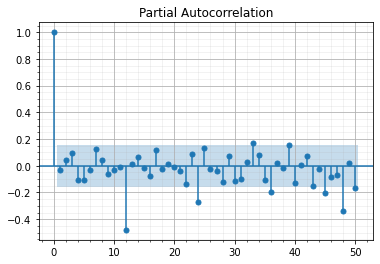

In [51]:
sm.graphics.tsa.plot_pacf(
    milk['prod_per_day_diff_12_1'].dropna().values.squeeze(), lags=50)
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

Какое начальное приближение для параметра p в модели SARIMA? Начальное приближение для `p` задаётся как номер последнего несезонного лага, при котором частичная автокорреляция значима.

В данном случае 0.